## Принятие решений в бизнесе на основе данных крупного интернет-магазина
**Задача:** Приоритезация гипотез по увеличению выручки. Запуск A/B-теста и анализ результатов.<br>
<br>
**План работы:**
1. Открыть файл с гипотезами.<br>
2. Подготовить данные (изучить данные, проверить типы данных на корректность)<br>
3. Применить фреймворки:
- ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
<br>
4. Открыть файлы с результатами A/B теста.
5. Проанализируйте A/B-тест:
- Построить график кумулятивной выручки по группам. 
- Построить график кумулятивного среднего чека по группам.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
- Построить график кумулятивного среднего количества заказов по группам.
- Построить график относительного изменения кумулятивного среднего количества заказов группы B к группе A.
- Построить точечный график количества заказов по пользователям.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитать статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
6. Принять решение по результатам теста и объяснить его.

**Описание данных:**<br>
Для первой части (файл hypothesis.csv):
- Hypothesis — краткое описание гипотезы
- Reach — охват пользователей по 10-балльной шкале
- Impact — влияние на пользователей по 10-балльной шкале
- Confidence — уверенность в гипотезе по 10-балльной шкале
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале

Для второй части (файлы orders.csv и visitors.csv):
- transactionId — идентификатор заказа
- visitorId — идентификатор пользователя, совершившего заказ
- date — дата, когда был совершён заказ
- revenue — выручка заказа
- group — группа A/B-теста, в которую попал заказ
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Для начала импортируем нужные библиотеки:

In [1]:
# импорт библиотек
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import scipy.stats as stats

## Изучение данных

Откроем и изучим данные о гипотезах:

In [2]:
source_hypothesis_data = pd.read_csv('/datasets/hypothesis.csv')
display(source_hypothesis_data.head(10))
source_hypothesis_data.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Откроем и изучим данные о заказах:

In [3]:
source_orders_data = pd.read_csv('/datasets/orders.csv')
display(source_orders_data.head(10))
source_orders_data.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


Откроем и изучим данные о посетителях:

In [4]:
source_visitors_data = pd.read_csv('/datasets/visitors.csv')
display(source_visitors_data.head(10))
source_visitors_data.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Все данные требуют дополнительной обработки: приведения к нижнему регистру, проверки на наличие пропусков и дубликатов, дату необходимо преобразовать в datetime.

## Предобработка данных
Приведение всех текстовых значений к нижнему регистру:

In [5]:
source_hypothesis_data.columns = source_hypothesis_data.columns.str.lower()
source_hypothesis_data['hypothesis'] = source_hypothesis_data['hypothesis'].str.lower()
display(source_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts
0,"добавить два новых канала привлечения трафика,...",3,10,8,6
1,"запустить собственную службу доставки, что сок...",2,5,4,10
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"изменить структура категорий, что увеличит кон...",8,3,3,8
4,"изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [6]:
source_orders_data.columns = source_orders_data.columns.str.lower()
source_orders_data['group'] = source_orders_data['group'].str.lower()
display(source_orders_data.head())

,transactionid,visitorid,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,b
1,2804400009,3642806036,2019-08-15,730,b
2,2961555356,4069496402,2019-08-15,400,a
3,3797467345,1196621759,2019-08-15,9759,b
4,2282983706,2322279887,2019-08-15,2308,b


In [7]:
source_visitors_data['group'] = source_visitors_data['group'].str.lower()
display(source_visitors_data.head())

,date,group,visitors
0,2019-08-01,a,719
1,2019-08-02,a,619
2,2019-08-03,a,507
3,2019-08-04,a,717
4,2019-08-05,a,756


Проверка на наличие дубликатов:

In [8]:
doubles_count_1 = source_hypothesis_data.duplicated().sum()
print('Количество дубликатов в данных о гипотезах: {:.0f}'.format(doubles_count_1))

Количество дубликатов в данных о гипотезах: 0


In [9]:
doubles_count_2 = source_orders_data.duplicated().sum()
print('Количество дубликатов в данных о заказах: {:.0f}'.format(doubles_count_2))

Количество дубликатов в данных о заказах: 0


In [10]:
doubles_count_3 = source_visitors_data.duplicated().sum()
print('Количество дубликатов в данных о посетителях: {:.0f}'.format(doubles_count_3))

Количество дубликатов в данных о посетителях: 0


Проверка на наличие пропусков:

In [11]:
print(source_hypothesis_data.isna().sum())

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64


In [12]:
print(source_orders_data.isna().sum())

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64


In [13]:
print(source_visitors_data.isna().sum())

date        0
group       0
visitors    0
dtype: int64


Как мы видим, пропусков нет. Займемся преобразованием типов данных:

In [14]:
source_orders_data['date'] = source_orders_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
source_orders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [15]:
source_visitors_data['date'] = source_visitors_data['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
source_visitors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Данные готовы к анализу. Приступим к первой части проекта.

## Приоритизация гипотез
Применим фреймворк ICE для приоритезации гипотез. Отсортируем гипотезы по убыванию приоритета.

In [16]:
source_hypothesis_data['ice'] = (source_hypothesis_data['impact'] * source_hypothesis_data['confidence']) / source_hypothesis_data['efforts']
ice_sorted_hypothesis_data = source_hypothesis_data.sort_values(by =['ice'], ascending = False)
display(ice_sorted_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts,ice
8,"запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000


Применим фреймворк RICE для приоритезации гипотез. Отсортируем гипотезы по убыванию приоритета.

In [17]:
source_hypothesis_data['rice'] = (source_hypothesis_data['reach'] * source_hypothesis_data['impact'] * source_hypothesis_data['confidence']) / source_hypothesis_data['efforts']
rice_sorted_hypothesis_data = source_hypothesis_data.sort_values(by =['rice'], ascending = False)
display(rice_sorted_hypothesis_data.head())

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2


**Промежуточный вывод:**
<br>Гипотезы "7" и "0" стабильно входят в тройку наилучших. Гипотезы 1, 3, 5 и 4 в обоих случаях занимают нижние строчки.
Состав пятёрки наилучших гипотез не меняется. При применении фреймворка RICE большую роль начинает играть охват, поэтому, внутри первой пятёрки на первое место вышли гипотезы с наилучшим охватом. Так как гипотезы "7" и "0" по ICE довльно близки, то лучше всего выбрать гипотезу с наибольшим охватом - "7".

## Анализ A/B-теста
Создадим датафрейм уникальных пар значений дат и групп для дальнейшей работы:

In [18]:
datesGroups = source_orders_data[['date','group']].drop_duplicates() 

Соберём агрегированные кумулятивные данные по дням о заказах:

In [19]:
ordersAggregated = datesGroups.apply(lambda x: source_orders_data[np.logical_and(source_orders_data['date'] <= x['date'], source_orders_data['group'] == x['group'])]\
                                    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : pd.Series.nunique, 'visitorid' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 


Соберём агрегированные кумулятивные данные по дням о посетителях:

In [20]:
visitorsAggregated = datesGroups.apply(lambda x: source_visitors_data[np.logical_and(source_visitors_data['date'] <= x['date'], source_visitors_data['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])


Создадим общую таблицу с кумулятивными данными:

In [21]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,a,24,20,148579,719
1,2019-08-01,b,21,20,101217,713
2,2019-08-02,a,44,38,242401,1338
3,2019-08-02,b,45,43,266748,1294
4,2019-08-03,a,68,62,354874,1845


Данные готовы для дальнейшей проработки.

**Построим график кумулятивной выручки по группам**

Создадим набор данных с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А:

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='a'][['date','revenue', 'orders']]
display(cumulativeRevenueA.head())

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


Создадим набор данных с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B:

In [23]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='b'][['date','revenue', 'orders']]
display(cumulativeRevenueB.head())

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


Выведем график:

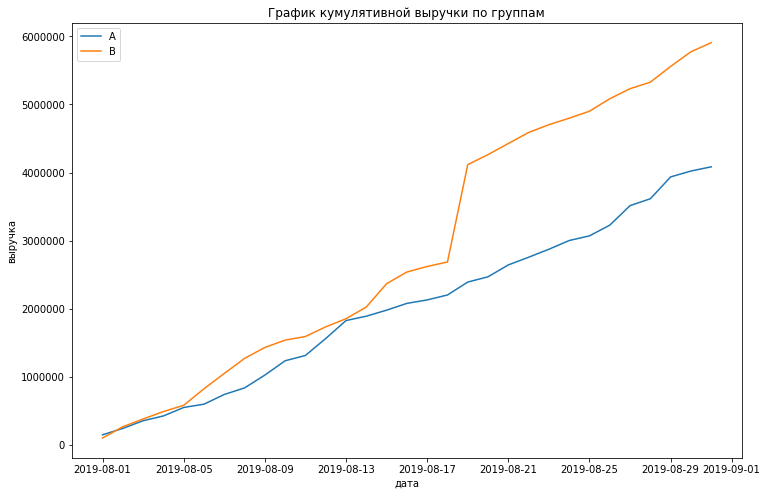

In [24]:
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.title('График кумулятивной выручки по группам');
plt.legend();
plt.ticklabel_format(axis = 'y', style = 'plain')

**Промежуточный вывод к графику кумулятивной выручки по группам:**

Оба графика растут. Наблюдается резкий скачок у группы B, скорее всего на ту дату были произведены заказы на крупную сумму или один заказ. Посмотрим, не было ли очень высоких заказов в дату 2019-08-19:

In [25]:
source_orders_data.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(5)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,b
530,3970235543,2912540959,2019-08-19,43990,a
527,1570513684,2837914161,2019-08-19,33405,b
421,3765974140,1357170471,2019-08-19,31680,a
461,2683113224,154576532,2019-08-19,26550,b


Теперь видно, что резкий скачок произошел из-за одного заказа на сумму в 1 294 500, по сравнению с остальными заказами он больше в несколько десятков раз.

## Построим график кумулятивного среднего чека по группам

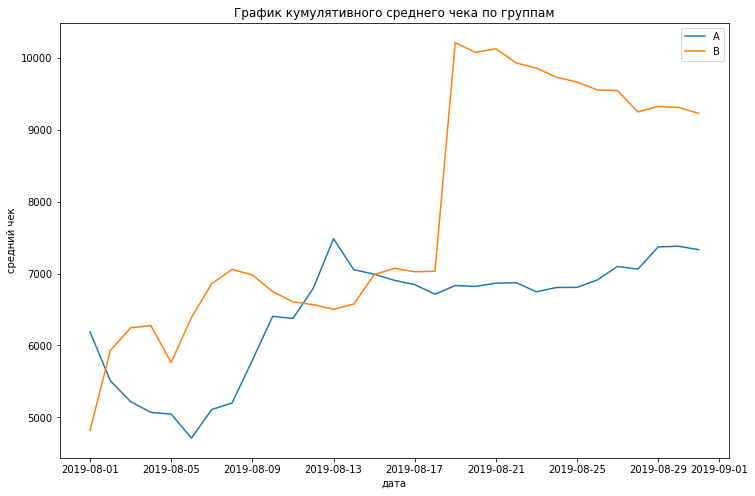

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

**Промежуточный вывод к графику кумулятивного среднего чека по группам:**

Показатели группы A более стабильны, наблюдается рост до 7500, далее график имеет колебания лишь в пределах 500 единиц. В течение почти всей первой половины графика показатели группы В выше чем у А, Далее 19 августа происходит резкий скачок опять же из-за уже указанного в пояснении к прошлому графики заказа.

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A

Соберём данные по кумулятивной выручке в один датафрейм:

In [27]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Строим график:

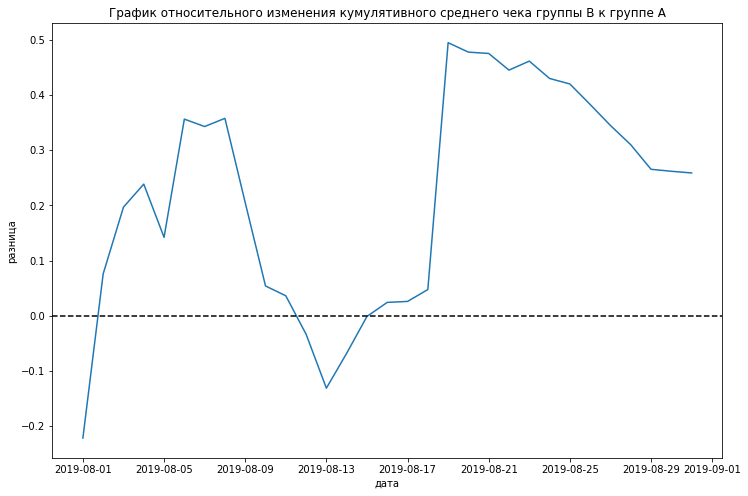

In [28]:
# cтроим отношение средних чеков
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('дата')
plt.ylabel('разница')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A');

**Промежуточный вывод к графику относительного изменения кумулятивного среднего чека группы B к группе A:**

Наблюдается несколько резких скачков, что явно свидетельствует о наличии заказов на крупную сумму.

## Построим график кумулятивного среднего количества заказов по группам

Посчитаем кумулятивную конверсию:

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

Выделим наборы данных для групп А и B:

In [30]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='a']
cumulativeDataB = cumulativeData[cumulativeData['group']=='b']

Строим график:

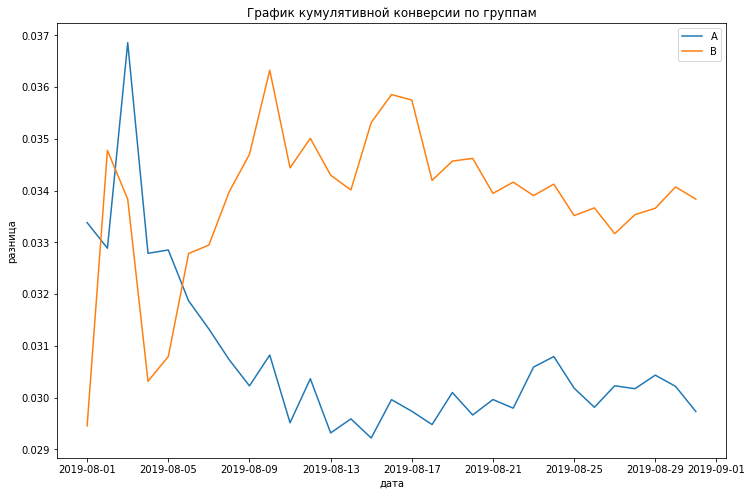

In [31]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xlabel('дата')
plt.ylabel('разница')
plt.title('График кумулятивной конверсии по группам');

**Промежуточный вывод к графику кумулятивного среднего количества заказов по группам:**

Конверсии групп разделились почти в самом начале, после чего каждая из них начала колебаться возле своего значения. Конверсия группы "B" стабильно превышает конверсию группы "A".

## Построим график относительного изменения кумулятивного среднего количества заказов группы B к группе A.

Соберём данные по кумулятивной конверсии в один набор:

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Построим график:

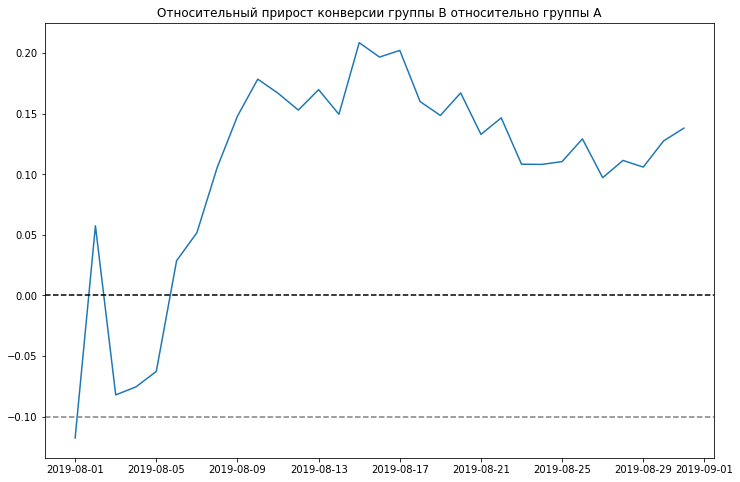

In [33]:
plt.figure(figsize=(12, 8))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');


**Промежуточный вывод к графику относительного изменения кумулятивного среднего количества заказов группы B к группе A**

Начиная с 6 августа группа "B" лидирует. Её конверсия росла до 16 августа и на максимуме составила около 20%, затем пошло постепенное снижение. К концу теста значение стало колебаться вокруг значения 0,13-0,15.

## Построим точечный график количества заказов по пользователям

Подсчитаем количество заказов по пользователям:

In [34]:
ordersByVisitors = source_orders_data.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
ordersByVisitors.columns = ['visitorid','transactions']
display(ordersByVisitors.sort_values(by='transactions',ascending=False).head(10))

,visitorid,transactions
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Построим диаграмму:

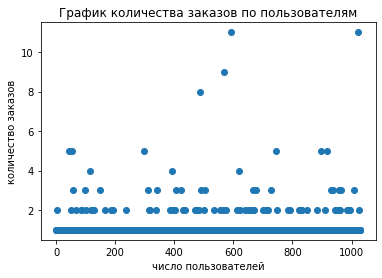

In [35]:
x_values = pd.Series(range(0,len(ordersByVisitors)))

plt.scatter(x_values, ordersByVisitors['transactions'])
plt.xlabel('число пользователей')
plt.ylabel('количество заказов')
plt.title('График количества заказов по пользователям');

**Промежуточный вывод к графику количества заказов по пользователям:**

По графику видно, что большинство клиентов делают 1 заказ, чуть реже - два.

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [36]:
print(np.percentile(ordersByVisitors['transactions'], [95, 99])) 

[2. 4.]


95% всех пользователей совершают 1-2 заказа. Все что более 2-ух заказов будем считать за границей аномальных пользователей.

## Построим точечный график стоимостей заказов

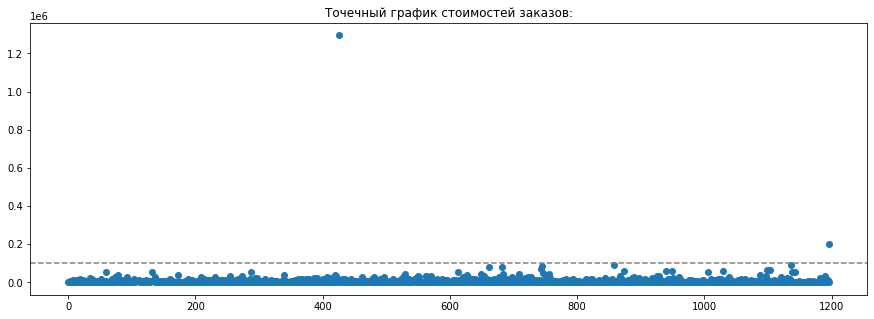

In [37]:
x_values = pd.Series(range(0,len(source_orders_data['revenue'])))
plt.figure(figsize=(15,5))
plt.axhline(y=100000, color='grey', linestyle='--')
plt.title('Точечный график стоимостей заказов:')
plt.scatter(x_values, source_orders_data['revenue'])

В графике присутствуют выбросы которые делают график неинформативным. Избавимся от 2 явных выбросов и возьмем только те значения, где результат меньше 195000.

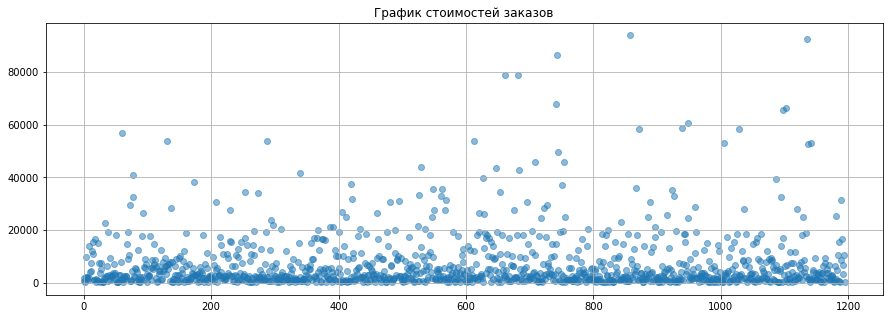

In [38]:
true_orders = source_orders_data[source_orders_data['revenue'] <= 195000]['revenue']
x_values = pd.Series(range(0,len(true_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, true_orders, alpha=0.5);

Судя по графикам, большинство покупателей тратят не больше 25-30 т.р. Проверим это далее, рассчитав перецентили.

## Посчитайте 95-й и 99-й перцентили стоимости заказов

In [39]:
print(np.percentile(source_orders_data['revenue'], [95, 99]))

[28000.  58233.2]


Значение больше 30 000 будут являться границей для определения аномальных заказов.

## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным:
<br>Нулевая гипотеза: конверсии посетителей в группе А и В статистически не отличаются.
<br>Альтернативная гипотеза: конверсии посетителей в группе А и В статистически отличаются.

In [40]:
#Найдём количество посетителей по датам в группе A:
visitorsADaily = source_visitors_data[source_visitors_data['group']=='a'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
#Найдём кумулятивную сумму количества посетителей по датам в группе A:
visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
#Найдём количество посетителей по датам в группе B:
visitorsBDaily = source_visitors_data[source_visitors_data['group']=='b'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
#Найдём кумулятивную сумму количества посетителей по датам в группе B:
visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']
#Найдём количество заказов и выручку по датам в группе A:
transactionsADaily = source_orders_data[source_orders_data['group']=='a'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
transactionsADaily.columns = ['date', 'transactionsPerDateA', 'revenuePerDateA']
#Найдём кумулятивную сумму количества заказов и выручки в группе A:
transactionsACummulative = transactionsADaily.apply(
    lambda x: \
        transactionsADaily[transactionsADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'transactionsPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
transactionsACummulative.columns = ['date', 'transactionsCummulativeA', 'revenueCummulativeA']
#Найдём количество заказов и выручку по датам в группе B:
transactionsBDaily = source_orders_data[source_orders_data['group']=='b'][['date', 'transactionid', 'visitorid', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'})
transactionsBDaily.columns = ['date', 'transactionsPerDateB', 'revenuePerDateB']
#Найдём кумулятивную сумму количества заказов и выручки в группе B:
transactionsBCummulative = transactionsBDaily.apply(
    lambda x: \
        transactionsBDaily[transactionsBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'transactionsPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
transactionsBCummulative.columns = ['date', 'transactionsCummulativeB', 'revenueCummulativeB']
#Соединим полученные данные в один набор для анализа:
total_raw_data = transactionsADaily.merge(transactionsBDaily, left_on='date', right_on='date', how='left')\
    .merge(transactionsACummulative, left_on='date', right_on='date', how='left')\
    .merge(transactionsBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

display(total_raw_data.head())

,date,transactionsPerDateA,revenuePerDateA,transactionsPerDateB,revenuePerDateB,transactionsCummulativeA,revenueCummulativeA,transactionsCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем заказы каждого посетителя, кто сделал хоть один заказ, в группе A:

In [41]:
transactionsByVisitorsA = source_orders_data[source_orders_data['group']=='a'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
transactionsByVisitorsA.columns = ['visitorid', 'transactions']

Посчитаем заказы каждого посетителя, кто сделал хоть один заказ, в группе B:

In [42]:
transactionsByVisitorsB = source_orders_data[source_orders_data['group']=='b'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
transactionsByVisitorsB.columns = ['visitorid', 'transactions']

Создадим набор данных с количеством заказов каждого посетителя в группах A и В:

In [43]:
sampleA = pd.concat([transactionsByVisitorsA['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateA'].sum() - len(transactionsByVisitorsA['transactions'])), name='transactions')],axis=0)
sampleB = pd.concat([transactionsByVisitorsB['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateB'].sum() - len(transactionsByVisitorsB['transactions'])), name='transactions')],axis=0)

Применим критерий Манна-Уитни, округлив значение до трёх знаков после запятой:

In [44]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided').pvalue))

0.017


Выведем относительный прирост конверсии группы B, округлив значение до трёх знаков после запятой::

In [45]:
print("Относительный прирост равен: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

Относительный прирост равен: 0.138


**Вывод:**
<br>По «сырым» данным различие в конверсиях групп A и B статистически значимо (p-value < 0,05). Значит, верна альтернативная гипотеза: конверсии посетителей в группе А и В статистически отличаются. При этом относительный выигрыш группы B равен 13,8%. 

## Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
<br>Нулевая гипотеза: средние чеки в группе А и В статистически не отличаются.
<br>Альтернативная гипотеза: средние чеки в группе А и В статистически отличаются.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по "сырым" данным:

In [46]:
print("{0:.3f}".format(stats.mannwhitneyu(source_orders_data[source_orders_data['group']=='a']['revenue'], source_orders_data[source_orders_data['group']=='b']['revenue'], alternative = 'two-sided')[1]))


0.729


Посмотрим различия в среднем чеке между группами:

In [47]:
print("{0:.3f}".format(source_orders_data[source_orders_data['group']=='b']['revenue'].mean()/source_orders_data[source_orders_data['group']=='a']['revenue'].mean()-1)) 

0.259


**Выводы:**
<br>P-value значительно больше 0,05 (0,729 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B значительно больше среднего чека группы A.

## Посчитаем статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным.

Согласно прошлым подсчетам аномальными значениеями являются: более двух заказов и заказы дороже 30000.
<br>Гипотезы остались такими же:
<br>Нулевая гипотеза: конверсии посетителей в группе А и В статистически не отличаются.
<br>Альтернативная гипотеза: конверсии посетителей в группе А и В статистически отличаются.

In [48]:
#Сделаем срез пользователей с числом заказов более двух:
visitorsWithManyTransactions = pd.concat([transactionsByVisitorsA[transactionsByVisitorsA['transactions'] > 2]['visitorid'], transactionsByVisitorsB[transactionsByVisitorsB['transactions'] > 2]['visitorid']], axis = 0)
#Сделаем срез пользователей, совершивших заказы дороже 30 000:
visitorsWithExpensiveTransactions = source_orders_data[source_orders_data['revenue'] > 30000]['visitorid']
#Соединим оба эти среза в одном наборе данных для анализа:
abnormalVisitors = pd.concat([visitorsWithManyTransactions, visitorsWithExpensiveTransactions], axis = 0).drop_duplicates().sort_values()
#Узнаем, сколько всего аномальных посетителей:
display(abnormalVisitors.shape) 

(68,)

In [49]:
#Подготовим набор данных без аномальных посетителей для группы A:
sampleAFiltered = pd.concat([transactionsByVisitorsA[np.logical_not(transactionsByVisitorsA['visitorid'].isin(abnormalVisitors))]['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateA'].sum() - len(transactionsByVisitorsA['transactions'])),name='transactions')],axis=0)
#Подготовим набор данных без аномальных посетителей для группы B:
sampleBFiltered = pd.concat([transactionsByVisitorsB[np.logical_not(transactionsByVisitorsB['visitorid'].isin(abnormalVisitors))]['transactions'],pd.Series(0, index=np.arange(total_raw_data['visitorsPerDateB'].sum() - len(transactionsByVisitorsB['transactions'])),name='transactions')],axis=0)

In [50]:
alpha = .05 
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)


print('p-значение: ', "{0:.3f}".format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

print('относительный выигрыш группы B:', "{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.013
Отвергаем нулевую гипотезу
относительный выигрыш группы B: 0.172


**Вывод:**
<br>По «очищенным» данным различие в конверсиях групп A и B по прежнему велико (p-value < 0,05). Значит, верна альтернативная гипотеза: конверсии посетителей в группе А и В статистически отличаются. При этом относительный выигрыш группы B увеличился с 13,8% до 17,2%.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
<br>Гипотезы:
<br>Нулевая гипотеза: различий в статистической значимости в среднем чеке между группами по "очищенным" данным нет 
<br>Альтернативная гипотеза: есть различия в статистической значимости в среднем чеке между группами по "очищенным" данным

Рассчитаем статистическую значимость различий в среднем чеке между сегментами после фильтрации:

In [51]:
print("{0:.3f}".format(stats.mannwhitneyu(
    source_orders_data[np.logical_and(
        source_orders_data['group']=='a',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'],
    source_orders_data[np.logical_and(
        source_orders_data['group']=='b',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'], alternative = 'two-sided')[1]))

0.720


Найдём относительные различия в среднем чеке между группами после фильтрации:

In [52]:
print("{0:.3f}".format(
    source_orders_data[np.logical_and(source_orders_data['group']=='b',np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'].mean()/
    source_orders_data[np.logical_and(
        source_orders_data['group']=='a',
        np.logical_not(source_orders_data['visitorid'].isin(abnormalVisitors)))]['revenue'].mean() - 1)) 

-0.023


**Вывод:**

P-value значительно больше 0,05 (0,720 > 0,05). Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. При этом средний чек группы B стал меньше среднего чека группы A на 0.023.

**ИТОГОВЫЙ ВЫВОД:**

Данные по конверсии отличаются, это можно проследить и по "чистым", и по "грязным" данным. Если убрать выбросы, то видно, что относительный выигрыш группы B составляет 17,2% (увеличился по сравнению с данными с выбросами). Средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше на ~26% (из-за заказа на крупную сумму). Прирост конверсии у группы B - неоспоримый факт, что при том же среднем чеке даёт увеличение выручки. Так как главной целью исследования является увеличение выручки, то проведение теста **можно остановить**.